In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

Train and test data are in the form of csv file. We use pandas read_csv to read the file. 

In [2]:
house_train = pd.read_csv('train.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
house_test = pd.read_csv('test.csv')
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
house_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Train and test data contains ID column. Id is the unique row identifier. That is unique to that particular column and it has nothing to do with the SalePrice. So we can safely remove ID column from both Train and Test data. 

In [6]:
house_train.drop(['Id'], axis=1, inplace=True)
house_test.drop(['Id'], axis=1, inplace=True)

In [7]:
print(house_train.shape)
print(house_test.shape)

(1460, 80)
(1459, 79)


After removing the Id column, the train and test data has 80 and 79 columns each. The one additional column in the train data is SalePrice. 

In [8]:
house_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
house_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Data Visualization
The most important variable of this dataset is the Sale Price. That is our target variable. Lets visualize our target variable to find more about that. 

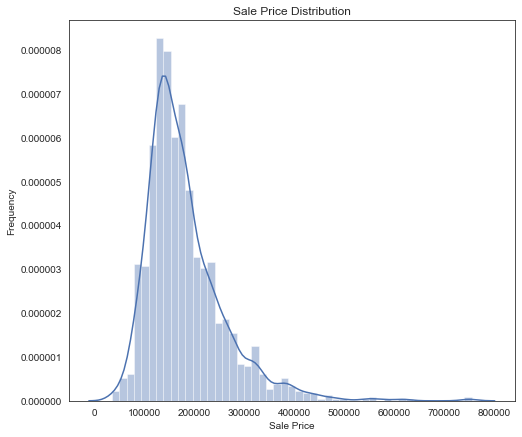

In [10]:
#SalePrice: the variable we're trying to predict
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8,7))

#Check the new distribution 
sns.distplot(house_train['SalePrice'], color='b')
ax.set(xlabel='Sale Price')
ax.set(ylabel= 'Frequency')
ax.set(title='Sale Price Distribution')
plt.show()

Now lets analyse the numerical and categorical values of the data. First of all we create scatter plots for all different numerical data and categorical data. 
1. Numerical Data Scatter Plots and regression plot. 

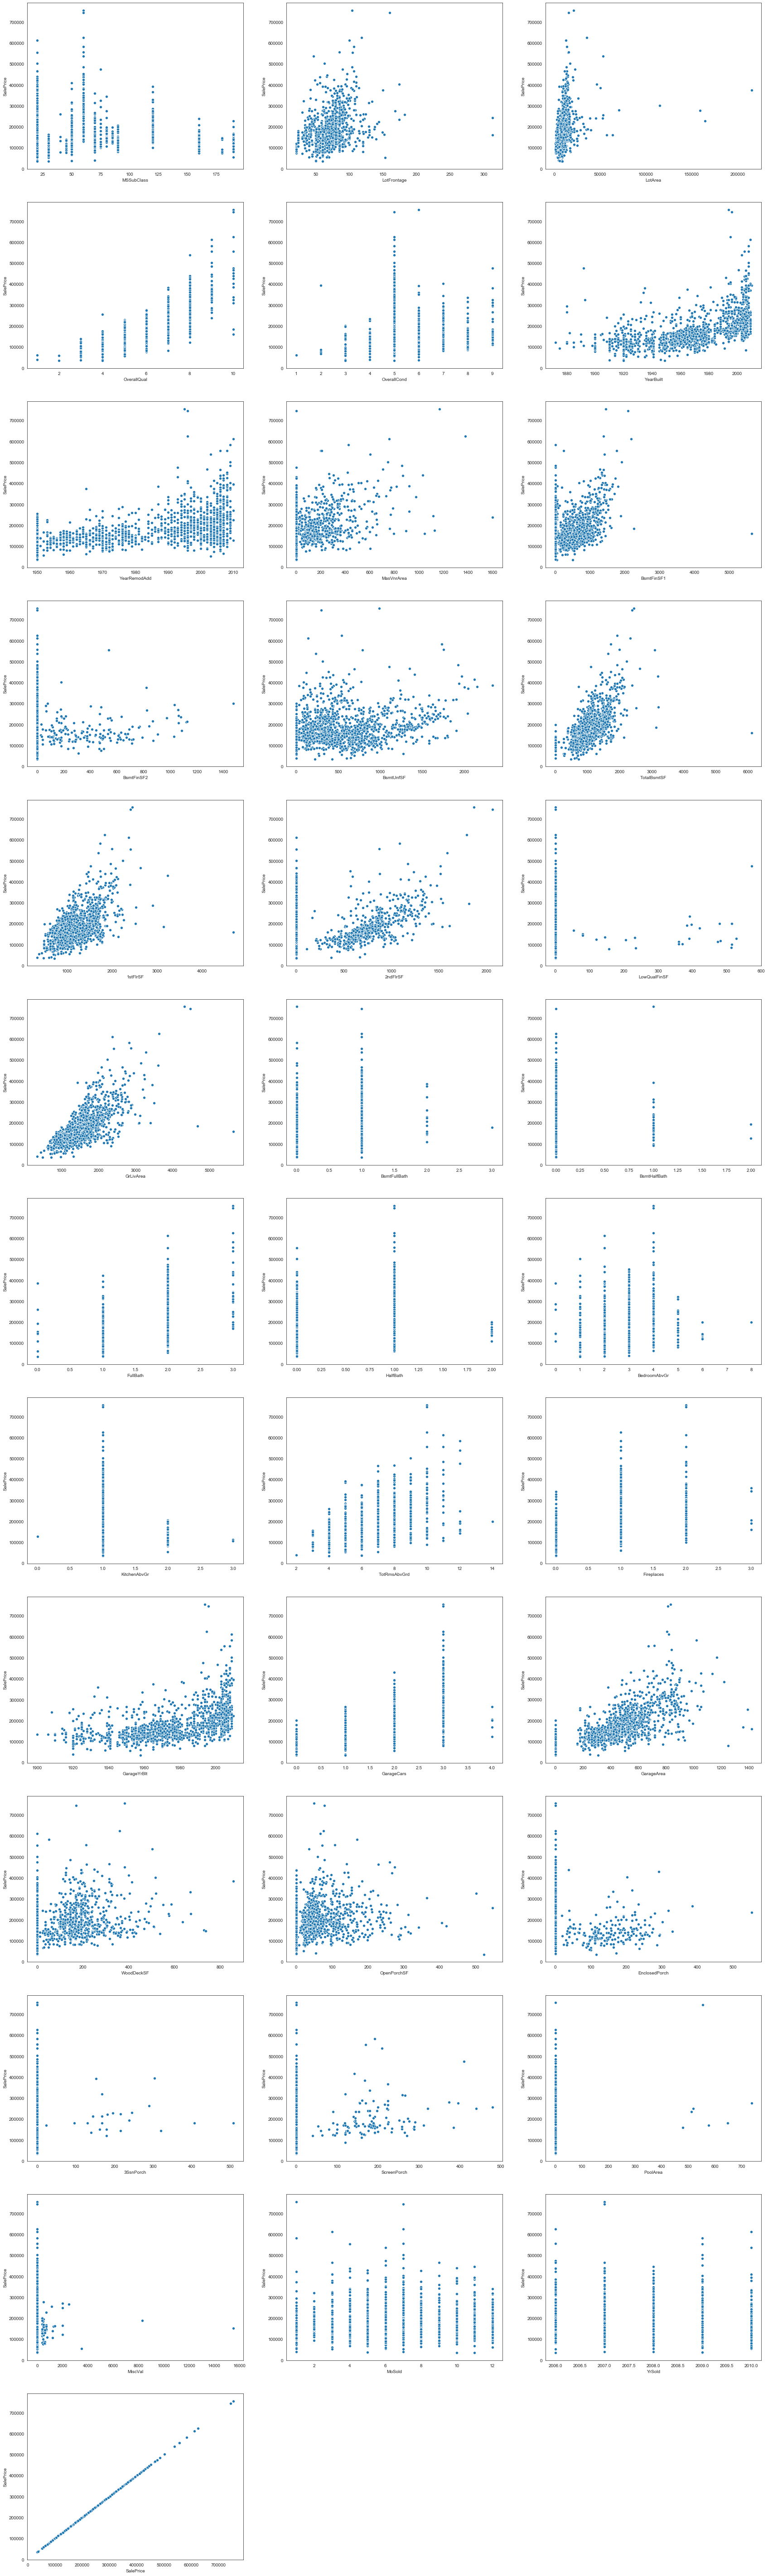

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
counter = 1
for col_name, col_values in house_train.select_dtypes(exclude='object').iteritems():
    plt.subplot(len(house_train.select_dtypes(exclude='object').columns), 3, counter)
    sns.scatterplot(x=col_name, y='SalePrice', palette='Blues', data=house_train)
    counter = counter+1

plt.show()


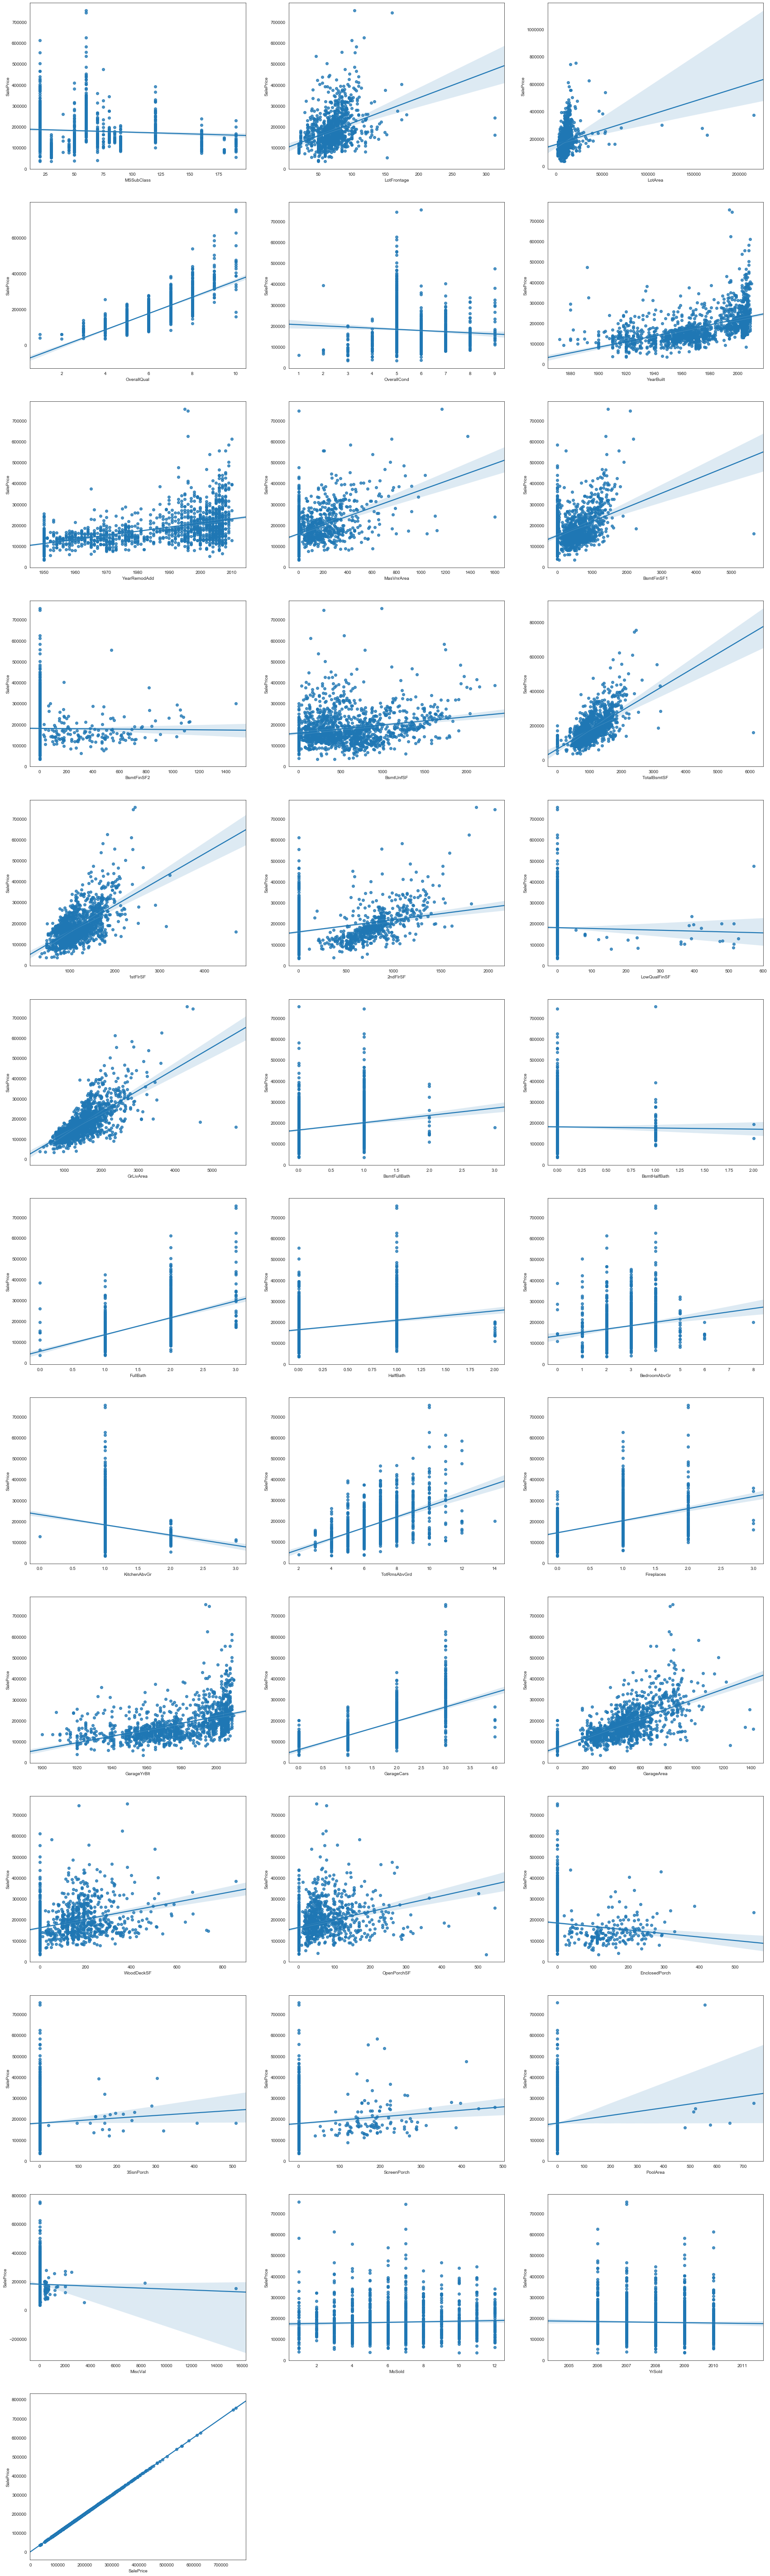

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
counter = 1
for col_name, col_values in house_train.select_dtypes(exclude='object').iteritems():
    plt.subplot(len(house_train.select_dtypes(exclude='object').columns), 3, counter)
    sns.regplot(x=col_name, y='SalePrice', data=house_train)
    counter = counter+1

plt.show()


## HeatMap
Lets make a matrix with numerical data and its correlation with SalePrice. The darker color shows a stronger correlation and lighter colors shows a weaker correlation. 

We can only the numerical data for the correlation matrix. So we can exclude all objects from our DataFrame. 

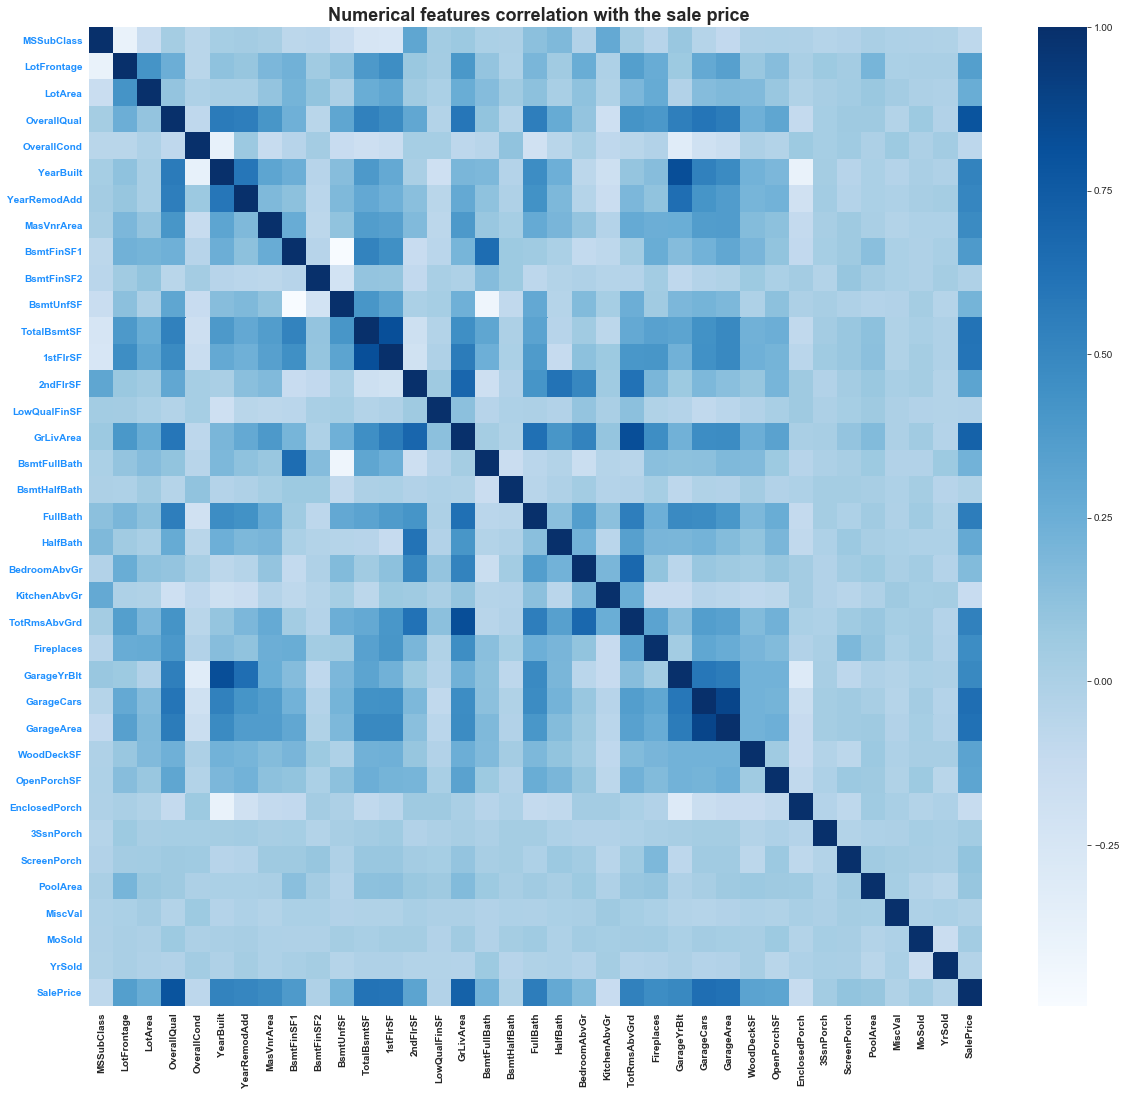

In [13]:
#corr - correlation matrix of the house train data. We are considering the numerical data for the correlation. 
corr = house_train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, cmap='Blues')
plt.title(' Numerical features correlation with the sale price', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

The aim of the project is to predict the sale price with respect to the available features. In the above correlation matrix we plot all the numerical data with respect to the sale price to find the correlation of each variables. Since we are trying to find the correlation to saleprice, we take the last row/column for further analysis. That may give us better picture. 

In [14]:
#the last row of correlation matrix - this shows the correlation of variables against SalePrice
house_train.corr().tail(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.38642,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0


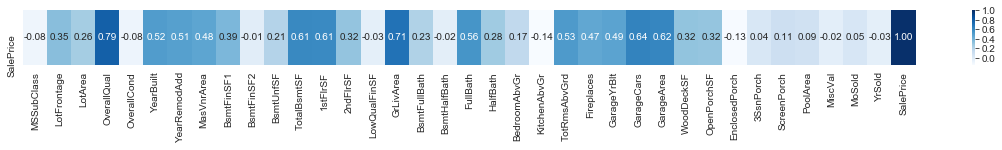

In [15]:
plt.figure(figsize=(20, 1))
sns.heatmap(house_train.corr().tail(1), cmap='Blues', annot=True, fmt='.2f')

The above field shows that there is no features which has a very strong negative correlation with the sale price. We can avoid values(negative and positive) with correlation less than 0.5. So the items we can include are: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd. No items have strong negative correlation.

In [16]:
corr_asc = corr['SalePrice'].sort_values(ascending=False).to_frame()
corr_asc

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Now it is time to clean our data. As the first step, we need to combine train and test data. Once we combine the train and test data, we can keep SalePrice separate. Only training set will have SalePrice. 

It is very important to combine train and test data for data cleaning. We need our training and testing data to be identical, that is why we combine the data. But we need to make sure, we never manipulate our data to get some kind of output. 

In [17]:
# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
train = house_train.shape[0]
y = house_train.SalePrice.values

test = house_test.shape[0]

all_data = pd.concat((house_train, house_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2919, 79)


In [18]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [19]:
y.size

1460

Now we can do our data cleaning. The first step is to find the NA values and fill the field with appropriate values. 

In [20]:
null_columns = all_data.isnull().mean().sort_values(ascending=False).reset_index()
null_columns.head(40)

,index,0
0,PoolQC,0.996574
1,MiscFeature,0.964029
2,Alley,0.932169
3,Fence,0.804385
4,FireplaceQu,0.486468
5,LotFrontage,0.166495
6,GarageFinish,0.054471
7,GarageQual,0.054471
8,GarageYrBlt,0.054471
9,GarageCond,0.054471


There are 35 columns with null values. We can plot all these 35 columns in bar diagram.

In [21]:
all_data.isnull().mean().sort_values(ascending=False).reset_index().head(35).transpose()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
index,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageFinish,GarageQual,GarageYrBlt,GarageCond,...,KitchenQual,GarageCars,Exterior1st,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,SaleType,Condition2
0,0.996574,0.964029,0.932169,0.804385,0.486468,0.166495,0.0544707,0.0544707,0.0544707,0.0544707,...,0.000342583,0.000342583,0.000342583,0.000342583,0.000342583,0.000342583,0.000342583,0.000342583,0.000342583,0


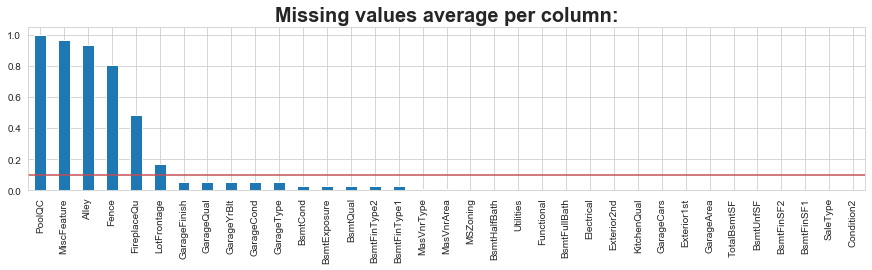

In [22]:
# determine the threshold for missing values
sns.set_style('whitegrid')
plt.figure(figsize=(15, 3))

all_data.isnull().mean().sort_values(ascending=False).head(35).plot.bar()
sns.palettes='windows blue'
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column:', fontsize=20, weight='bold' )
plt.show()


We need to analyze each of these features and imputes missing values.
First lets analyze the data to get more idea. Here I am putting all 35 colums, my intution, type of data, how to fill the na values. 
I am trying to understand data from the data description page. 

In [23]:
features = ['PoolQC', 'MiscFeature', 'Alley']
all_data[features].describe()

,PoolQC,MiscFeature,Alley
count,10,105,198
unique,3,4,2
top,Gd,Shed,Grvl
freq,4,95,120


1. PoolQC	- Pool quality, NA - no pool. More than 99% data missing. That means almost all houses are without pool. Only 10 houses are with pool out of 2919 houses. 
2. MiscFeature	- Miscellaneous feature not covered in other categories. NA means none (no misc features for the house). 
I would safely remove these 2 features from our prediction. 
Also remove PoolArea. When pool data missing, it is good to remove pool area altogether. 

In [24]:
all_data.drop(['PoolQC', 'MiscFeature', 'PoolArea'], axis=1, inplace=True)
all_data.shape

(2919, 76)

These are numerical values and I will add the detailed description later in the follwing cells. 

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
I would like to compare these to features to see if they are somehow related. 

In [25]:
features = ['Street', 'Alley']
all_data[features].describe()

,Street,Alley
count,2919,198
unique,2,2
top,Pave,Grvl
freq,2907,120


In the above cell, I was trying to compare the Street( Type of road access to property) and Alley (Type of alley access to property). But I think there is no direct relationship between the 2. There is no missing data in Stree column. Almost all property has paved access. Lets fill the Alley missing columns with None values. 

3. Alley - Type of alley access to property and NA - No alley access. 
So we can impute NA value with None. 

In [26]:
all_data['Alley'] = all_data['Alley'].fillna('None')

4. Fence - Fence: Fence quality and NA means no fence so we can impute None for NA values

In [27]:
all_data['Fence'] = all_data['Fence'].fillna('None')

6. LotFrontage - LotFrontage: Linear feet of street connected to property. This feature should have a numerical value. 
 Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


In [28]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

5. FireplaceQu - Fireplace quality. Impute None for NA values. 
7. GarageFinish - Interior finish of the garage NA - no garrage
8. GarageQual - Garage quality (NA- No garrage)
10. GarageCond - Garage Condition. NA - No Garrage. 
11. GarageType - Garage location. NA- No Garrage

In [29]:
features = ['FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']
for items in features:
    all_data[items]= all_data[items].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.) If there is no garage, then the year build, area of garage and capacity of garage all will be 0.

10. GarageYrBlt
11. GarageArea
12. GarageCars

In [30]:
features = ['GarageYrBlt', 'GarageArea', 'GarageCars']
for items in features:
    all_data[items] = all_data[items].fillna(0)

In [31]:
null_columns = all_data.isnull().mean().sort_values(ascending=False).reset_index()
null_columns.head(18)

,index,0
0,BsmtCond,0.028092
1,BsmtExposure,0.028092
2,BsmtQual,0.027749
3,BsmtFinType2,0.027407
4,BsmtFinType1,0.027064
5,MasVnrType,0.008222
6,MasVnrArea,0.007879
7,MSZoning,0.001370
8,BsmtHalfBath,0.000685
9,BsmtFullBath,0.000685


13. BsmtCond - NA means None or no basement
14. BsmtExposure - NA is None or no basement
15. BsmtQual - NA is no basement None
16. BsmtFinType2 - NA with None.
17. BsmtFinType1 - NA with None.

In [32]:
features = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
for items in features:
    all_data[items] = all_data[items].fillna('None')

18. MasVnrType if no data we can replace that with None


In [33]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

19. MasVnrArea is Masonry veneer area in square feet. So we can replace null value with 0


In [34]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [35]:
#20. MSZoning : Identifies the general zoning classification of the sale. We can find the most frequent zoning value and replace NA value with that. 
all_data['MSZoning'].mode()[0]

'RL'

In [36]:
#We can replace MSZoning NA values with RL - Residential Low Density
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

21. Functional: Home functionality (Assume typical unless deductions are warranted)
So we can fill na values with Typ	(Typical Functionality)

In [37]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

22. Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [38]:
print(all_data['Utilities'].isnull().sum())
print(all_data['Utilities'].unique())
print(all_data['Utilities'].value_counts())

2
['AllPub' 'NoSeWa' nan]
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [39]:
#We are removing the entire column because most of the 
all_data = all_data.drop(['Utilities'], axis=1)

23. BsmtFullBath: Basement full bathrooms
24. BsmtHalfBath: Basement half bathrooms
25. GarageArea: Size of garage in square feet
26. GarageCars: Size of garage in car capacity
27. BsmtFinSF2: Type 2 finished square feet
28. BsmtFinSF1: Type 1 finished square feet
29. TotalBsmtSF: Total square feet of basement area
30. BsmtUnfSF: Unfinished square feet of basement area
replace NA values with 0

In [40]:
features = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',  'TotalBsmtSF', 'BsmtUnfSF']
for items in features:
    all_data[items]= all_data[items].fillna(0)

In [41]:
features = ['GarageArea','GarageCars' ]
for items in features:
    all_data[items] = all_data[items].fillna(0)

31. Exterior2nd - VinylSd - Vinyl Siding
32. Exterior1st - VinylSd - Vinyl Siding
33. KitchenQual - TA - Typical/Average
34. Electrical- SBrkr - Standard Circuit Breakers & Romex
35. SaleType - WD - Warranty Deed - Conventional
fill all these values with mode value

In [42]:
print(all_data['Exterior1st'].mode()[0])
print(all_data['Exterior2nd'].mode()[0])
print(all_data['KitchenQual'].mode()[0])
print(all_data['Electrical'].mode()[0])
print(all_data['SaleType'].mode()[0])

VinylSd
VinylSd
TA
SBrkr
WD


In [43]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [44]:
null_columns = all_data.isnull().mean().sort_values(ascending=False).reset_index()
null_columns

,index,0
0,YrSold,0.0
1,Condition2,0.0
2,EnclosedPorch,0.0
3,ExterCond,0.0
4,ExterQual,0.0
...,...,...
70,LotShape,0.0
71,LowQualFinSF,0.0
72,MSSubClass,0.0
73,MSZoning,0.0


Some of the non-numeric predictors are stored as numbers; convert them into strings

1. MSSubClass: Identifies the type of dwelling involved in the sale.
2. YrSold: Year Sold (YYYY)
3. MoSold: Month Sold (MM)
4. OverallCond: Rates the overall condition of the house
5. OverallQual: Rates the overall material and finish of the house

In [45]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)

No more NA values, we impute values for all NA values. Lets analyze each of these variables. 

In [46]:
print(all_data.select_dtypes(include='object').columns)
print(len(all_data.select_dtypes(include='object').columns))
#There are 45 categorical variables. Some of them are ordinal data. Lets find that out fitst. 

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold',
       'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold'],
      dtype='object')
45


Lets analyze our data for ordinal data (Ordinal data is a categorical, statistical data type where the variables have set order.) and other categorical data which could be relevant for our analysis. We are looking for values with variance. lets encode the features


In [47]:
from sklearn.preprocessing import LabelEncoder

features = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',   'CentralAir', 'ExterCond', 'ExterQual', \
            'Fence', 'FireplaceQu',  'Functional',  'GarageCond', 'GarageFinish','GarageQual', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape','MSSubClass', 'MoSold', \
            'OverallCond', 'PavedDrive',  'YrSold']

# process columns, apply LabelEncoder to categorical features
label_encoder = LabelEncoder()
for items in features:
    label_encoder.fit(list(all_data[items].values)) 
    all_data[items] = label_encoder.transform(list(all_data[items].values))


Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [48]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF'] 

In [49]:
# Find skewed numerical features
skewed = all_data.select_dtypes(exclude='object').skew()

In [50]:
skewed = skewed[abs(skewed) > 0.5]
skewed.sort_values(ascending=False).reset_index()

,index,0
0,MiscVal,21.958480
1,LotArea,12.829025
2,LowQualFinSF,12.094977
3,3SsnPorch,11.381914
4,LandSlope,4.977715
5,KitchenAbvGr,4.304467
6,BsmtFinSF2,4.148275
7,EnclosedPorch,4.005950
8,ScreenPorch,3.948723
9,BsmtHalfBath,3.933616


(array([2.9e+03, 1.1e+01, 3.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 2.0e+00]),
 array([    0.,  1700.,  3400.,  5100.,  6800.,  8500., 10200., 11900.,
        13600., 15300., 17000.]),
 <a list of 10 Patch objects>)

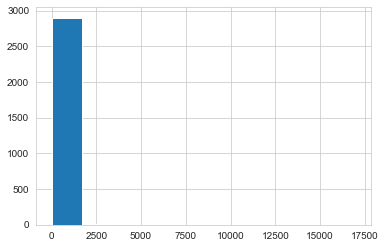

In [51]:
plt.hist(all_data['MiscVal'])

In [52]:
#Box-Cox 
'''from scipy.special import boxcox1p
lambda_val = 1
for features in skewed.index:
    all_data[features] = boxcox1p(all_data[features], lambda_val)'''

'from scipy.special import boxcox1p\nlambda_val = 1\nfor features in skewed.index:\n    all_data[features] = boxcox1p(all_data[features], lambda_val)'

In [53]:
all_data[skewed.index]= all_data[skewed.index].applymap(lambda x: np.log(x+1))

In [54]:
skewed = all_data.select_dtypes(exclude='object').skew()
skewed = skewed[abs(skewed) > 0.5]
skewed.sort_values(ascending=False).reset_index()

,index,0
0,3SsnPorch,8.829794
1,LowQualFinSF,8.562091
2,MiscVal,5.216665
3,LandSlope,4.486542
4,BsmtHalfBath,3.776703
5,KitchenAbvGr,3.522161
6,ScreenPorch,2.947420
7,BsmtFinSF2,2.463749
8,BldgType,1.971066
9,EnclosedPorch,1.962089


(array([  19.,    0.,    0.,    9.,    0.,   65.,    0.,   70.,   35.,
        2721.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

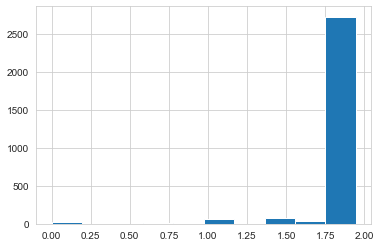

In [55]:
plt.hist(all_data['Functional'])

In [56]:
skewed = all_data.select_dtypes(exclude='object').skew()
skewed = skewed[abs(skewed) > 0.5]
skewed.sort_values(ascending=False).reset_index()

,index,0
0,3SsnPorch,8.829794
1,LowQualFinSF,8.562091
2,MiscVal,5.216665
3,LandSlope,4.486542
4,BsmtHalfBath,3.776703
5,KitchenAbvGr,3.522161
6,ScreenPorch,2.947420
7,BsmtFinSF2,2.463749
8,BldgType,1.971066
9,EnclosedPorch,1.962089


In [57]:
#Log transofrm the data for better normalization
#all_features[skewed.index]= np.log(all_features[skewed.index])

#all_data[skewed.index]= all_data[skewed.index].applymap(lambda x: np.log(x+1))

In [58]:
skewed = all_data.select_dtypes(exclude='object').skew()
skewed = skewed[abs(skewed) > 0.5]
skewed.sort_values(ascending=False).reset_index()

,index,0
0,3SsnPorch,8.829794
1,LowQualFinSF,8.562091
2,MiscVal,5.216665
3,LandSlope,4.486542
4,BsmtHalfBath,3.776703
5,KitchenAbvGr,3.522161
6,ScreenPorch,2.947420
7,BsmtFinSF2,2.463749
8,BldgType,1.971066
9,EnclosedPorch,1.962089


In [59]:
   #check if df has any infinity values
print(all_data.columns.contains(np.inf))
print(all_data.columns.contains(-np.inf))

##check if df has any na values
print(all_data.columns.contains(np.nan))

False
False
False


In [60]:
all_data.select_dtypes(exclude='object')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,OverallCond,PavedDrive,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,6.753438,6.751101,0.0,0.693147,3,0.000000,1.609438,1.386294,6.561031,0.0,...,1.609438,1.098612,0.0,2.197225,6.753438,0.000000,7.602900,2003,2,7.850493
1,7.141245,0.000000,0.0,0.693147,3,0.000000,1.609438,0.693147,6.886532,0.0,...,2.079442,1.098612,0.0,1.945910,7.141245,5.700444,7.589336,1976,1,7.833996
2,6.825460,6.765039,0.0,0.693147,3,0.000000,1.609438,1.098612,6.188264,0.0,...,1.609438,1.098612,0.0,1.945910,6.825460,0.000000,7.601902,2002,2,7.903596
3,6.869014,6.629363,0.0,0.693147,3,0.000000,0.693147,1.386294,5.379897,0.0,...,1.609438,1.098612,0.0,2.079442,6.629363,0.000000,7.557995,1970,0,7.813592
4,7.044033,6.960348,0.0,0.693147,4,0.000000,1.609438,0.000000,6.486161,0.0,...,1.609438,1.098612,0.0,2.302585,7.044033,5.262690,7.601402,2000,2,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,6.304449,6.304449,0.0,0.693147,3,1.386294,1.609438,1.386294,0.000000,0.0,...,1.945910,1.098612,0.0,1.791759,6.304449,0.000000,7.586296,1970,0,7.401842
2915,6.304449,6.304449,0.0,0.693147,3,1.609438,1.609438,1.386294,5.533389,0.0,...,1.609438,1.098612,0.0,1.945910,6.304449,0.000000,7.586296,1970,0,7.401842
2916,7.110696,0.000000,0.0,0.693147,4,0.000000,1.609438,1.386294,7.110696,0.0,...,1.945910,1.098612,0.0,2.079442,7.110696,6.163315,7.581210,1996,0,7.803435
2917,6.878326,0.000000,0.0,0.693147,3,0.000000,1.609438,0.000000,5.823046,0.0,...,1.609438,1.098612,0.0,1.945910,6.816736,4.394449,7.597396,1992,0,7.540622


In [61]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2919, 220)

In [62]:

house_train = all_data[:train]
house_test = all_data[train:]
print(house_train.shape)
print(house_test.shape)

(1460, 220)
(1459, 220)


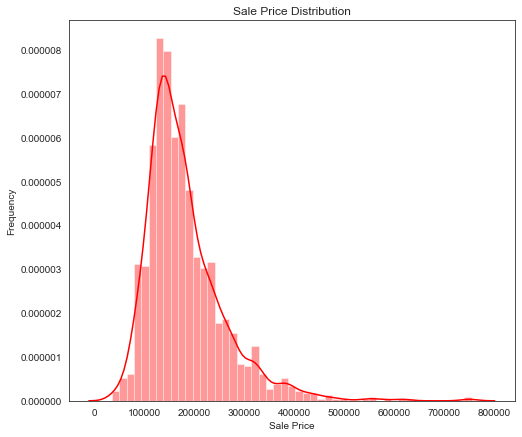

In [63]:
#SalePrice: the variable we're trying to predict
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8,7))

#Check the new distribution 
sns.distplot(y, color='red')
ax.set(xlabel='Sale Price')
ax.set(ylabel= 'Frequency')
ax.set(title='Sale Price Distribution')
plt.show()

In [64]:
# log transform
y = np.log(y)


 mu = 12.02 and sigma = 0.40



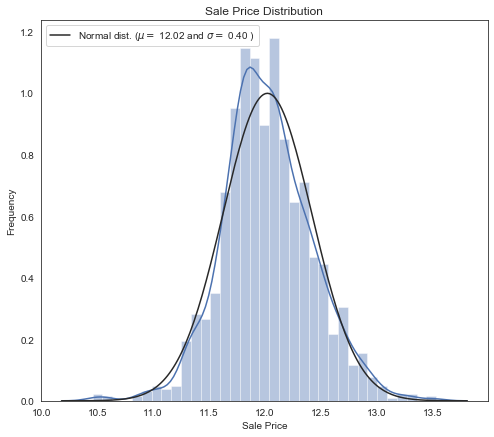

In [65]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8,7))

#Check the new distribution 
sns.distplot(y, fit=norm, color='b')

# Get the fitted parameters used by the function
#mu - mean of the distribution
#sigma - standard diviation
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

ax.set(xlabel='Sale Price')
ax.set(ylabel= 'Frequency')
ax.set(title='Sale Price Distribution')

plt.show()

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [67]:
X = house_train
y = y

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [69]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1095, 220)
(365, 220)
(1095,)
(365,)


In [70]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_train = linear_model.predict(X_train)
y_linear_train

array([11.71195067, 11.99405993, 11.90431774, ..., 11.71349724,
       12.13359144, 12.3069563 ])

In [71]:
error_dict_linear = {}
mse = mean_squared_error(y_train, y_linear_train)
rmse = np.sqrt(mse)
error_dict_linear.update({'Linear Model Train: ': rmse})
rmse

0.09057401461177875

In [72]:
#predict house price for validation data
y_linear_val = linear_model.predict(X_val)

In [73]:
#mean square error for validation data
mse = mean_squared_error(y_val, y_linear_val)
rmse = np.sqrt(mse)
error_dict_linear.update({'Linear Model Valid: ': rmse})
rmse

0.17026391870133417

In [74]:
#Predicted y values: 
y_linear = linear_model.predict(house_test)

In [75]:
# path to file you will use for predictions
test_data_path = 'test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)
# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': y_linear})
output.to_csv('submission.csv', index=False)

In [76]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_train_rf = rf_model.predict(X_train)

In [77]:
mse = mean_squared_error(y_train, y_train_rf)
rmse = np.sqrt(mse)
error_dict_linear.update({'RF Model Train: ': rmse})
rmse

0.05571526882210467

In [78]:
y_val_rf = rf_model.predict(X_val)

In [79]:
mse = mean_squared_error(y_val, y_val_rf)
rmse = np.sqrt(mse)
error_dict_linear.update({'RF Model Valid: ': rmse})
rmse

0.14193683575548924

In [80]:
y_test_rf = rf_model.predict(house_test)

In [81]:
# path to file you will use for predictions
test_data_path = 'test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)
# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': y_test_rf})

output.to_csv('submission.csv', index=False)

In [82]:
#Implement k fold cross validation
from sklearn.model_selection import KFold
n_fold = 10

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=n_fold))
    mean_rmse = np.mean(rmse)
    return (mean_rmse)

In [83]:
cv_rmse(linear_model)

0.1319321789537106

In [84]:
cv_rmse(rf_model)

0.1413220333120807

L1 and L2 Regularization
Lasso Regression and Ridge Regression
We can use same parameters for lasso and ridge regression

In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]}
ridge_regressor  = GridSearchCV(ridge_model, parameters, scoring="neg_mean_squared_error", cv=n_fold)
ridge_regressor.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0009, 0.0007, 0.0005,
                                   0.0003, 0.0001, 0.001, 0.05, 0.01, 0.1, 0.3,
                                   1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [86]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.015799256213830864


In [87]:
y_ridge = ridge_regressor.predict(house_test)
y_ridge

array([11.669885  , 11.94183391, 12.12727848, ..., 12.06216553,
       11.67286612, 12.32602899])

In [88]:
# path to file you will use for predictions
test_data_path = 'test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)
# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': y_ridge})

output.to_csv('submission_ridge.csv', index=False)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]}
lasso_regressor  = GridSearchCV(lasso_model, parameters, scoring="neg_mean_squared_error", cv=n_fold)
lasso_regressor.fit(X, y)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
y_lasso = lasso_regressor.predict(house_test)

In [ ]:
# path to file you will use for predictions
test_data_path = 'test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)
# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': y_lasso})

output.to_csv('submission_lasso.csv', index=False)